## This is a new evaluation for presentation at SCIA-2024 (Takamatsu)

In [11]:
import numpy as np
import scipy as sp
from scipy import stats
import periodicity_detection as period
import time
from src.gen_synthetic import sinewave
import src.onlineSLE as utility

import matplotlib.pyplot as plt

## Full length data

In [12]:
np.random.seed(0)
seasonal = sinewave(25000,100,1)
residual = 0.2 * np.random.randn(len(seasonal))
ts = stats.zscore(seasonal+ residual)

window_sizes = range(300,10000,200)
print(window_sizes)
com_time = []
num_sliding_window = 10000

range(300, 10000, 200)


## Periodogram

In [13]:
## NumpyFFT

for window_size in window_sizes:
    total_time = 0
    W = ts[:window_size]
    start_fft = np.fft.fft(W)
    xfreq, p_den = utility.peridogram(window_size, start_fft)
    for idx in range(0,num_sliding_window):
        newest_x = ts[window_size+idx]
        oldest_x = W[0]
        W = W[1:]
        W = np.append(W, newest_x)
        start_time = time.time()            # start time
        start_fft = np.fft.fft(W)
        xfreq, p_den = utility.peridogram(window_size, start_fft)
        end_time = time.time()              # end time
        total_time += (end_time - start_time)
    avg_time_ms = (total_time / num_sliding_window) * 1000
    print({'algorithm': 'numpy.FFT',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})
    com_time.append({'algorithm': 'numpy.FFT',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})

{'algorithm': 'numpy.FFT', 'window_size': 300, 'avg_time': 0.008717703819274903}
{'algorithm': 'numpy.FFT', 'window_size': 500, 'avg_time': 0.009534955024719238}
{'algorithm': 'numpy.FFT', 'window_size': 700, 'avg_time': 0.011930465698242188}
{'algorithm': 'numpy.FFT', 'window_size': 900, 'avg_time': 0.013832902908325194}
{'algorithm': 'numpy.FFT', 'window_size': 1100, 'avg_time': 0.022124457359313964}
{'algorithm': 'numpy.FFT', 'window_size': 1300, 'avg_time': 0.02200322151184082}
{'algorithm': 'numpy.FFT', 'window_size': 1500, 'avg_time': 0.029918408393859865}
{'algorithm': 'numpy.FFT', 'window_size': 1700, 'avg_time': 0.035969662666320804}
{'algorithm': 'numpy.FFT', 'window_size': 1900, 'avg_time': 0.03469195365905762}
{'algorithm': 'numpy.FFT', 'window_size': 2100, 'avg_time': 0.029912900924682618}
{'algorithm': 'numpy.FFT', 'window_size': 2300, 'avg_time': 0.041970252990722656}
{'algorithm': 'numpy.FFT', 'window_size': 2500, 'avg_time': 0.04576570987701416}
{'algorithm': 'numpy.FF

In [14]:
## Scipy FFt
for window_size in window_sizes:
    total_time = 0
    W = ts[:window_size]
    start_fft = sp.fft.fft(W)
    xfreq, p_den = utility.peridogram(window_size, start_fft)
    for idx in range(0,num_sliding_window):
        newest_x = ts[window_size+idx]
        oldest_x = W[0]
        W = W[1:]
        W = np.append(W, newest_x)
        start_time = time.time()                        # start time
        start_fft = sp.fft.fft(W)
        xfreq, p_den = utility.peridogram(window_size, start_fft)
        end_time = time.time()                          # end time
        total_time += (end_time - start_time)
    avg_time_ms = (total_time / num_sliding_window) * 1000
    print({'algorithm': 'scipy.FFT',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})
    com_time.append({'algorithm': 'scipy.FFT',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})

{'algorithm': 'scipy.FFT', 'window_size': 300, 'avg_time': 0.008440923690795897}
{'algorithm': 'scipy.FFT', 'window_size': 500, 'avg_time': 0.010188794136047364}
{'algorithm': 'scipy.FFT', 'window_size': 700, 'avg_time': 0.012303352355957031}
{'algorithm': 'scipy.FFT', 'window_size': 900, 'avg_time': 0.013833212852478027}
{'algorithm': 'scipy.FFT', 'window_size': 1100, 'avg_time': 0.016137361526489258}
{'algorithm': 'scipy.FFT', 'window_size': 1300, 'avg_time': 0.017931151390075683}
{'algorithm': 'scipy.FFT', 'window_size': 1500, 'avg_time': 0.019040822982788086}
{'algorithm': 'scipy.FFT', 'window_size': 1700, 'avg_time': 0.02157576084136963}
{'algorithm': 'scipy.FFT', 'window_size': 1900, 'avg_time': 0.02350482940673828}
{'algorithm': 'scipy.FFT', 'window_size': 2100, 'avg_time': 0.025292587280273438}
{'algorithm': 'scipy.FFT', 'window_size': 2300, 'avg_time': 0.02610602378845215}
{'algorithm': 'scipy.FFT', 'window_size': 2500, 'avg_time': 0.028031635284423827}
{'algorithm': 'scipy.FF

In [15]:
## SDFT
for window_size in window_sizes:
    total_time = 0
    W = ts[:window_size]
    start_fft = np.fft.fft(W)
    xfreq, p_den = utility.peridogram(window_size, start_fft)
    N = len(start_fft)
    k = np.arange(N)
    twiddle = np.exp(2j * np.pi * k / N)
    for idx in range(0,num_sliding_window):
        newest_x = ts[window_size+idx]
        oldest_x = W[0]
        W = W[1:]
        W = np.append(W, newest_x)
        start_time = time.time()                              # start time
        start_fft = utility.update_sDFT(start_fft, oldest_x, newest_x, twiddle)
        xfreq, p_den = utility.peridogram(window_size, start_fft)
        end_time = time.time()                                # end time
        total_time += (end_time - start_time)
    
    avg_time_ms = (total_time / num_sliding_window) * 1000
    print({'algorithm': 'SDFT',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})
    com_time.append({'algorithm': 'SDFT',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})

{'algorithm': 'SDFT', 'window_size': 300, 'avg_time': 0.007054805755615234}
{'algorithm': 'SDFT', 'window_size': 500, 'avg_time': 0.007991576194763183}
{'algorithm': 'SDFT', 'window_size': 700, 'avg_time': 0.009439897537231446}
{'algorithm': 'SDFT', 'window_size': 900, 'avg_time': 0.010513615608215331}
{'algorithm': 'SDFT', 'window_size': 1100, 'avg_time': 0.0114396333694458}
{'algorithm': 'SDFT', 'window_size': 1300, 'avg_time': 0.012734484672546387}
{'algorithm': 'SDFT', 'window_size': 1500, 'avg_time': 0.013573980331420899}
{'algorithm': 'SDFT', 'window_size': 1700, 'avg_time': 0.014549708366394043}
{'algorithm': 'SDFT', 'window_size': 1900, 'avg_time': 0.015559005737304689}
{'algorithm': 'SDFT', 'window_size': 2100, 'avg_time': 0.01645212173461914}
{'algorithm': 'SDFT', 'window_size': 2300, 'avg_time': 0.01730504035949707}
{'algorithm': 'SDFT', 'window_size': 2500, 'avg_time': 0.018202614784240723}
{'algorithm': 'SDFT', 'window_size': 2700, 'avg_time': 0.019247722625732423}
{'algor

## All SLE methods

In [18]:
# Findlength
num_sliding_window = 1000
for window_size in window_sizes:
    total_time = 0  # To accumulate the total execution time of period.find_length(buffer)
    #
    for idx in range(0,num_sliding_window):
        W = ts[idx:window_size + idx]
        start_time = time.time()
        SLE_result = period.find_length(W)
        end_time = time.time()
        total_time += (end_time - start_time)
    
    
    avg_time_ms = (total_time / num_sliding_window) * 1000
    print({'algorithm': 'FindLength',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})
    com_time.append({'algorithm': 'FindLength',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})

{'algorithm': 'FindLength', 'window_size': 300, 'avg_time': 0.060309410095214844}
{'algorithm': 'FindLength', 'window_size': 500, 'avg_time': 0.04993247985839844}
{'algorithm': 'FindLength', 'window_size': 700, 'avg_time': 0.05785226821899414}
{'algorithm': 'FindLength', 'window_size': 900, 'avg_time': 0.06904768943786621}
{'algorithm': 'FindLength', 'window_size': 1100, 'avg_time': 0.0789482593536377}
{'algorithm': 'FindLength', 'window_size': 1300, 'avg_time': 0.08077454566955566}
{'algorithm': 'FindLength', 'window_size': 1500, 'avg_time': 0.0852670669555664}
{'algorithm': 'FindLength', 'window_size': 1700, 'avg_time': 0.0951378345489502}
{'algorithm': 'FindLength', 'window_size': 1900, 'avg_time': 0.09631562232971191}
{'algorithm': 'FindLength', 'window_size': 2100, 'avg_time': 0.12082886695861816}
{'algorithm': 'FindLength', 'window_size': 2300, 'avg_time': 0.1206669807434082}
{'algorithm': 'FindLength', 'window_size': 2500, 'avg_time': 0.12884187698364258}
{'algorithm': 'FindLeng

In [19]:
# OnlineSLE
for window_size in window_sizes:
    total_time = 0
    buffer = ts[:window_size]
    start_fft = sp.fft.fft(buffer)
    xfreq, p_den = utility.peridogram(window_size, start_fft)
    peak_index = utility.get_period_hints(p_den)
    N = len(start_fft)
    k = np.arange(N)
    twiddle = np.exp(2j * np.pi * k / N)
    for idx in range(0,num_sliding_window):
        newest_x = ts[window_size+idx]
        oldest_x = buffer[0]
        W = W[1:]
        W = np.append(W, newest_x)
        start_time = time.time()
        start_fft = utility.update_sDFT(start_fft, oldest_x, newest_x, twiddle)
        xfreq, p_den = utility.peridogram(window_size, start_fft)
        peak_index = utility.get_period_hints(p_den)
        end_time = time.time()
        total_time += (end_time - start_time)

    
    avg_time_ms = (total_time / num_sliding_window) * 1000

    print({'algorithm': 'OnlineSLE',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})
    com_time.append({'algorithm': 'OnlineSLE',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})

{'algorithm': 'OnlineSLE', 'window_size': 300, 'avg_time': 0.009203433990478516}
{'algorithm': 'OnlineSLE', 'window_size': 500, 'avg_time': 0.010024785995483398}
{'algorithm': 'OnlineSLE', 'window_size': 700, 'avg_time': 0.010729312896728516}
{'algorithm': 'OnlineSLE', 'window_size': 900, 'avg_time': 0.011798381805419922}
{'algorithm': 'OnlineSLE', 'window_size': 1100, 'avg_time': 0.012918949127197266}
{'algorithm': 'OnlineSLE', 'window_size': 1300, 'avg_time': 0.014055728912353516}
{'algorithm': 'OnlineSLE', 'window_size': 1500, 'avg_time': 0.015183687210083008}
{'algorithm': 'OnlineSLE', 'window_size': 1700, 'avg_time': 0.016352176666259766}
{'algorithm': 'OnlineSLE', 'window_size': 1900, 'avg_time': 0.01730179786682129}
{'algorithm': 'OnlineSLE', 'window_size': 2100, 'avg_time': 0.01996016502380371}
{'algorithm': 'OnlineSLE', 'window_size': 2300, 'avg_time': 0.019701719284057617}
{'algorithm': 'OnlineSLE', 'window_size': 2500, 'avg_time': 0.02308964729309082}
{'algorithm': 'OnlineSL

In [20]:
# AutoPeriod
for window_size in window_sizes:
    total_time = 0  # To accumulate the total execution time of period.find_length(buffer)
    #
    for idx in range(0,num_sliding_window):
        W = ts[idx:window_size + idx]
        start_time = time.time()
        SLE_result = period.autoperiod(W)
        end_time = time.time()
        total_time += (end_time - start_time)
    
    avg_time_ms = (total_time / num_sliding_window) * 1000
    print({'algorithm': 'AutoPeriod',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})
    com_time.append({'algorithm': 'AutoPeriod',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})

{'algorithm': 'AutoPeriod', 'window_size': 300, 'avg_time': 5.958028078079224}
{'algorithm': 'AutoPeriod', 'window_size': 500, 'avg_time': 5.7757275104522705}
{'algorithm': 'AutoPeriod', 'window_size': 700, 'avg_time': 6.929511308670044}
{'algorithm': 'AutoPeriod', 'window_size': 900, 'avg_time': 8.25926661491394}
{'algorithm': 'AutoPeriod', 'window_size': 1100, 'avg_time': 7.35467267036438}
{'algorithm': 'AutoPeriod', 'window_size': 1300, 'avg_time': 7.390071868896484}
{'algorithm': 'AutoPeriod', 'window_size': 1500, 'avg_time': 8.172863483428955}
{'algorithm': 'AutoPeriod', 'window_size': 1700, 'avg_time': 8.16776180267334}
{'algorithm': 'AutoPeriod', 'window_size': 1900, 'avg_time': 8.715895414352417}
{'algorithm': 'AutoPeriod', 'window_size': 2100, 'avg_time': 9.134996891021729}
{'algorithm': 'AutoPeriod', 'window_size': 2300, 'avg_time': 9.496944189071655}
{'algorithm': 'AutoPeriod', 'window_size': 2500, 'avg_time': 9.183923959732056}
{'algorithm': 'AutoPeriod', 'window_size': 270

In [21]:
# SAZED
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
sazedR = importr('sazedR')          # sazedR in CRAN

for window_size in window_sizes:
    total_time = 0
    for idx in range(0,num_sliding_window):
        W = ts[idx:window_size + idx]
        W = robjects.FloatVector(W)
        start_time = time.time()
        SLE_result = sazedR.sazed(W)
        end_time = time.time()
        total_time += (end_time - start_time)
    
    avg_time_ms = (total_time / num_sliding_window) * 1000
    print({'algorithm': 'SAZED',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})
    com_time.append({'algorithm': 'SAZED',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})

{'algorithm': 'SAZED', 'window_size': 300, 'avg_time': 3.1857035160064697}
{'algorithm': 'SAZED', 'window_size': 500, 'avg_time': 3.337698459625244}
{'algorithm': 'SAZED', 'window_size': 700, 'avg_time': 4.652320623397827}
{'algorithm': 'SAZED', 'window_size': 900, 'avg_time': 4.638961315155029}
{'algorithm': 'SAZED', 'window_size': 1100, 'avg_time': 6.358004808425903}
{'algorithm': 'SAZED', 'window_size': 1300, 'avg_time': 6.987967014312744}
{'algorithm': 'SAZED', 'window_size': 1500, 'avg_time': 7.561682462692261}
{'algorithm': 'SAZED', 'window_size': 1700, 'avg_time': 8.815869331359863}
{'algorithm': 'SAZED', 'window_size': 1900, 'avg_time': 8.603969812393188}
{'algorithm': 'SAZED', 'window_size': 2100, 'avg_time': 11.494245290756226}
{'algorithm': 'SAZED', 'window_size': 2300, 'avg_time': 11.116997480392456}
{'algorithm': 'SAZED', 'window_size': 2500, 'avg_time': 11.119609117507935}
{'algorithm': 'SAZED', 'window_size': 2700, 'avg_time': 13.566391468048096}
{'algorithm': 'SAZED', '

In [22]:
import pandas as pd
df = pd.DataFrame(com_time)

/var/folders/39/cpb13rr53hx1nyfrgqhk18pc0000gn/T/ipykernel_52613/55142410.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(algorithms))
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


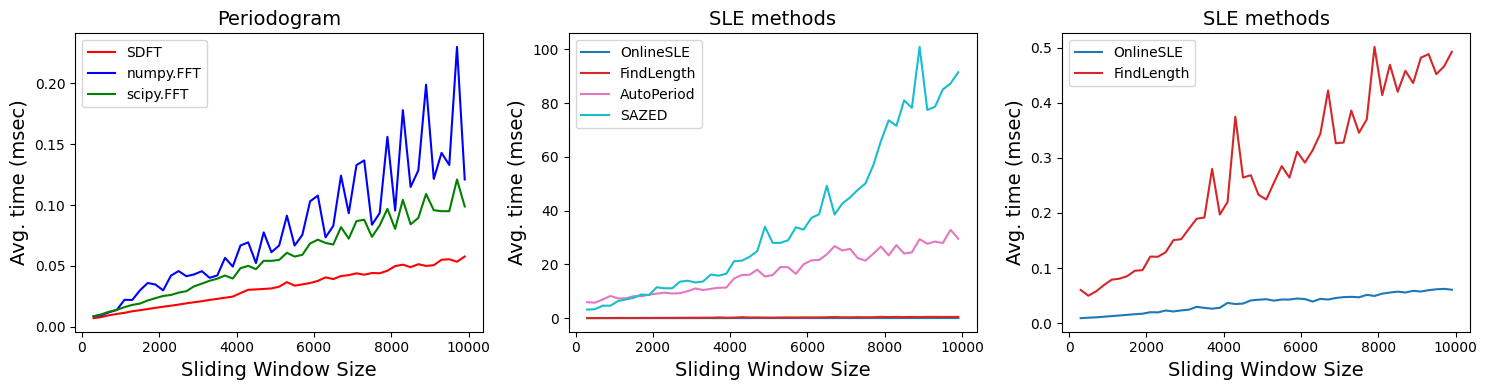

In [23]:

algorithms = ['OnlineSLE','FindLength','AutoPeriod', 'SAZED']
colors = plt.cm.get_cmap('tab10', len(algorithms))

fig, axs = plt.subplots(1, 3, figsize=(15, 4))


subset = df[df['algorithm'] == 'SDFT']
axs[0].plot(subset['window_size'], subset['avg_time'], linestyle='-', 
             color='red', label='SDFT')
subset = df[df['algorithm'] == 'numpy.FFT']
axs[0].plot(subset['window_size'], subset['avg_time'], linestyle='-', 
             color='blue', label='numpy.FFT')
subset = df[df['algorithm'] == 'scipy.FFT']
axs[0].plot(subset['window_size'], subset['avg_time'], linestyle='-', 
             color='green', label='scipy.FFT')

axs[0].set_xlabel('Sliding Window Size', fontsize=14)
axs[0].set_ylabel('Avg. time (msec)', fontsize=14) 
axs[0].set_title('Periodogram', fontsize=14)
axs[0].legend()

for i, algorithm in enumerate(algorithms):
    subset = df[df['algorithm'] == algorithm]
    axs[1].plot(subset['window_size'], subset['avg_time'], linestyle='-', 
             color=colors(i), label=algorithm)

# plt.title('Accuracy Rate (Fig5a)', fontsize=16)
axs[1].set_xlabel('Sliding Window Size', fontsize=14)
axs[1].set_ylabel('Avg. time (msec)', fontsize=14)
axs[1].set_title('SLE methods', fontsize=14)
axs[1].legend()

for i, algorithm in enumerate(algorithms[:2]):
    subset = df[df['algorithm'] == algorithm]
    axs[2].plot(subset['window_size'], subset['avg_time'], linestyle='-', 
             color=colors(i), label=algorithm)

# plt.title('Accuracy Rate (Fig5a)', fontsize=16)
axs[2].set_xlabel('Sliding Window Size', fontsize=14)
axs[2].set_ylabel('Avg. time (msec)', fontsize=14) 
axs[2].set_title('SLE methods', fontsize=14)
axs[2].legend()

plt.tight_layout()
plt.savefig('acc_time.eps',format='eps')

In [ ]:
colors = plt.cm.get_cmap('tab10', len(algorithms))
colors